## Instruções da Atividade

Utilize o dataset MNIST.

Realize a classificação utilizando o kNN, Decision Tree e Random Forest, Naive Bayes Gaussiano e calcule algumas métricas.

Utilize o K-means. Realize experimentos com 10 clusters e uma quantidade incorreta de clusters.

Realize diferentes experimentos, mudando o k do kNN (utilize o GridSearch), o número de florestas no Random Forest (utilize o RandomSearch), e o ‘critério’ do Decision Tree (utilize o GridSearch).

Utilize o t-SNE para redução de dimensionalidade.

Realize a normalização e padronização dos dados, utilize o melhor classificador.

Discuta os resultados.


## Importações

In [145]:
import pandas as pd
import numpy as np
import mnist
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import Normalizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier
from sklearn.manifold import TSNE
import matplotlib as plt

## Recebendo os dados

In [130]:
x_train = np.reshape(mnist.train_images(), (60000,784))
x_test = np.reshape(mnist.test_images(), (10000,784))

In [131]:
y_train = mnist.train_labels()
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [132]:
y_test = mnist.test_labels()
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

## KNN

Set KNN:
   * Fazendo fit do KNN:

Utilizando GridSearch

In [61]:
nknn = [1,3,5,7,9,11,13,15]
params = {'n_neighbors': nknn}
knn = KNeighborsClassifier()
gs_knn = GridSearchCV(knn,params)
gs_knn.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]})

Predict KNN:

In [63]:
pred_knn = gs_knn.predict(x_test)

Accuracy KNN:

In [64]:
accuracy_score(y_test,pred_knn)

0.9705

## Pré-Processamento de dados

In [133]:
transformer = Normalizer().fit(x_train)
x_train_proc = transformer.transform(x_train)
transformer = Normalizer().fit(x_test)
x_test_proc = transformer.transform(x_test)

## Decision Tree

Set Decision Tree:
   * Fazendo fit da Decision Tree:

Utilizando GridSearch

In [67]:
criterion = ['gini','entropy']
params = {'criterion': criterion}
dt = DecisionTreeClassifier()
gs_dt = GridSearchCV(dt,params)
gs_dt.fit(x_train_proc,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy']})

Fazendo o predict da Decision Tree:

In [72]:
pred_tree = gs_dt.predict(x_test_proc)

Accuracy da Decision Tree:

In [73]:
accuracy_score(y_test,pred_tree)

0.8832

## Random Forest Classificador

Set RandomForestClasifier:
   * Fazendo fit do RandomForestClassifier:

Utilizando o RandomSearch

In [9]:
lista_rf = [x for x in range(50,300,50)]
params = {'n_estimators':lista_rf}
rfc = RandomForestClassifier()
clf_rf = RandomizedSearchCV(rfc, params, n_iter=3)
clf_rf.fit(x_train_proc,y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=3,
                   param_distributions={'n_estimators': [50, 100, 150, 200,
                                                         250]})

Fazendo o predict do RandomForest:

In [10]:
pred_forrest = clf_rf.predict(x_test)

Recebendo as Accuracy:

In [11]:
accuracy_score(y_test,pred_forrest)

0.9594

## Bayes

Setando Naive Bayes (Gaussian):

In [12]:
gnb = GaussianNB()

Fazendo fit & predict :

In [13]:
y_pred = gnb.fit(x_train_proc, y_train).predict(x_test)

Accuracy:

In [14]:
accuracy_score(y_test,y_pred)

0.6772

## K-Means

In [65]:
kmeans = KMeans(n_clusters=10).fit(x_train_proc)

In [66]:
label = kmeans.labels_
label

array([1, 6, 2, ..., 1, 7, 1])

In [112]:
y_test = kmeans.predict(x_train_proc)

In [113]:
df = pd.DataFrame(y_test)

In [114]:
df['labels'] = label

In [115]:
accuracy_score(df['labels'],y_test)

1.0

In [100]:
kmeans = KMeans(n_clusters=6).fit(x_train_proc)

In [101]:
label =  kmeans.labels_

In [102]:
y_test = kmeans.predict(x_train)

In [106]:
df = pd.DataFrame(y_test)

In [107]:
df['labels'] = label

In [108]:
accuracy_score(df['labels'],y_test)

0.9167833333333333

## MLP


In [126]:
clf = MLPClassifier().fit(x_train_proc,y_train)

In [134]:
pred = clf.predict(x_test_proc)

In [135]:
accuracy_score(y_test,pred)

0.977

## TSNE

In [149]:
x_embedded = TSNE(n_components=2, learning_rate='auto',init='random').fit_transform(x_train_proc[1:10000,:])

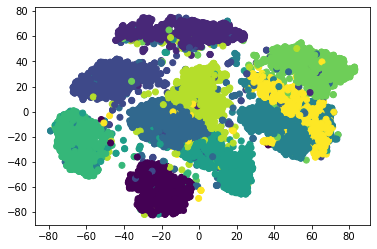

In [151]:
plt.pyplot.scatter(x_embedded[:,0],x_embedded[:,1], c=y_train[1:10000])